# Section 3.6 - Mars SmallSat Aerocapture - Guidance Scheme

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
planet = Planet('MARS')
planet.loadAtmosphereModel('../../../atmdata/Mars/mars-gram-avg.dat', 0 , 1 ,2, 3)
planet.h_skip = 120.0E3

# Set up a vehicle object
vehicle1=Vehicle('MarsSmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.35, planet)
vehicle1.setInitialState(120.0,88.15,-0.65,5.3581,8.5458,-5.00,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

Find the corridor bounds to select a target nominal EFPA for a nominal Mars atmosphere, with inertial correction.

In [3]:
underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10, 2000.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 0.1, -20.0,-5.0, 1E-10,  2000.0)

print("Target apoapis: 2000 km")
print("----------------")
print(underShootLimit, exitflag_us)
print(overShootLimit,  exitflag_os)
print("----------------")

Target apoapis: 2000 km
----------------
-9.868216123049933 1.0
-8.781097070641408 1.0
----------------


Propagate an entry tarjectory at mid-corridor

In [4]:
# Set planet.h_low to 10 km, if vehicle dips below this level
# trajctory is terminated.
planet.h_low=10.0E3

# Set target orbit = 2000 km x 2000 km, tolerance = 20 km
# target apo intentionally set to slightly higher value to account for bias in guidance
vehicle1.setTargetOrbitParams(200.0, 2500.0, 20.0)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0, 
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle1.setDragEntryPhaseParams(2.0, 20.0, 101, -200.0)

# Set beta_1 and beta_ratio
vehicle1.setDragModulationVehicleParams(20, 7.5)

# Set vehicle initial state
vehicle1.setInitialState(120.0,88.15,-0.65,5.3581,8.5458,-9.0,0.0,0.0)
# Propogate a single vehicle trajectory
vehicle1.propogateGuidedEntryD2(0.5,1.0,0.1,2400.0)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


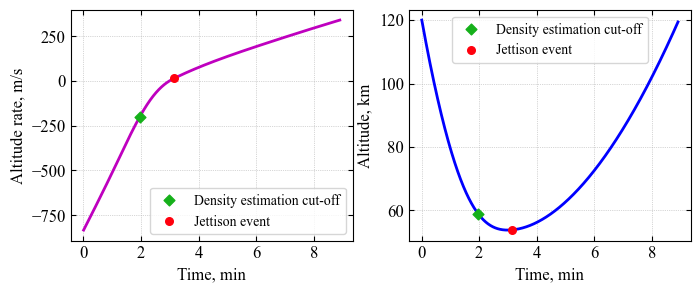

In [49]:
plt.figure(figsize=(8, 3))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.subplot(1, 2, 1)
plt.plot(vehicle1.t_step_array[1:], vehicle1.hdot_array[1:], 'm-', linewidth=2.0)

plt.scatter(vehicle1.t_step_array[np.where(vehicle1.hdot_array[1:]>-200)[0][0]],
            vehicle1.hdot_array[np.where(vehicle1.hdot_array[1:]>-200)[0][0]],marker="D", s=30, color='xkcd:green', zorder=100, label='Density estimation cut-off')
plt.scatter(vehicle1.t_switch, vehicle1.hdot_array[np.where(vehicle1.t_step_array>vehicle1.t_switch)[0][0]], marker="o", s=30, color='xkcd:bright red', zorder=100, label='Jettison event')
plt.ylabel('Altitude rate, m/s',fontsize=12)
plt.xlabel('Time, min',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)
plt.legend(loc='lower right', fontsize=10)

plt.subplot(1, 2, 2)
plt.plot(vehicle1.t_min_full, vehicle1.h_km_full, 'b-', linewidth=2.0)

plt.scatter(vehicle1.t_step_array[np.where(vehicle1.hdot_array[1:]>-200)[0][0]],
            vehicle1.h_step_array[np.where(vehicle1.hdot_array[1:]>-200)[0][0]],marker="D", s=30, color='xkcd:green', zorder=100, label='Density estimation cut-off')
plt.scatter(vehicle1.t_switch, vehicle1.h_switch, marker="o", s=30, color='xkcd:bright red', zorder=100, label='Jettison event')

plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Altitude, km',fontsize=12)
plt.legend(loc='upper center', fontsize=10)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)






plt.savefig('../../../data/mdpi-aerospace/smallsat-mission-concepts/mars/mars-smallsat-guidance-schematic.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../../data/mdpi-aerospace/smallsat-mission-concepts/mars/mars-smallsat-guidance-schematic.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../../../data/mdpi-aerospace/smallsat-mission-concepts/mars/mars-smallsat-guidance-schematic.eps', dpi=300,bbox_inches='tight')


plt.show()

In [50]:
vehicle1.t_switch

3.141666666666658